In [1]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score

# Практикум 2, PyTorch

PyTorch - одна из самых популярных библиотек для глубокого обучения. Две основные вещи, которые она делает:
* Замена Numpy в вычислениях на GPU/TPU(Tensor Processing Unit)/IPU(Intelligent Processing Unit)
* Автоматическое дифференциирование

Что можно посмотреть еще:
* [Официальные туториалы по PyTorch](https://pytorch.org/tutorials/index.html)
* Сравнение PyTorch и TF https://habr.com/ru/company/ru_mts/blog/565456/


## 1. Тензоры 

Тензор в PyTorch - аналог np.ndarray, n-мерный массив. Они нужны для хранения входных и выходных данных модели, и хранения параметров модели (например, веса нейросетки).

[Связь тензоров и np.ndarray](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)

In [2]:
# пример создания тензора из данных
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
# можно создавать тензор из массива
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
# очень многие операции работают как в np.ndarray
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

# можно создавать массив со случайными значениями
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3742, 0.6512],
        [0.9066, 0.9558]]) 



In [5]:
# помимо привычных атрибутов, к тензору добавился еще один атрибут - device. Там записано, где именно сидит тензор (CPU, GPU, ...)

tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [6]:
# чтобы делать какие-то вычисления с тензором на GPU/TPU/..., нужно сначала его туда поместить
if torch.cuda.is_available(): # проверяем, что GPU доступна
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")
   
    device = torch.device("cuda")
    # или можно сразу создавать тензор на gpu
    tensor = torch.rand(3, 4, device=device)
    print(f"Device tensor is stored on: {tensor.device}")

## 2. Dataset and dataloader

Некоторые самые популярные датасеты типа MNIST уже есть в PyTorch, их можно быстро и легко загрузить. Посмотреть датасеты можно в [torchvision](https://pytorch.org/vision/stable/datasets.html), [torchtext](https://pytorch.org/text/stable/datasets.html), [torchaudio](https://pytorch.org/audio/stable/datasets.html)



In [8]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
    root="data", # root is the path where the train/test data is stored
    train=True, # train specifies training or test dataset
    download=True, # download=True downloads the data from the internet if it’s not available at root
    transform=ToTensor() # transform and target_transform specify the feature and label transformations
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/home/rustam/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756395985/work/torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


/n/n/n---------------/n/n/n
torch.Size([1, 28, 28])
torch.float32
cpu
/n/n/n---------------/n/n/n
0
torch.Size([28, 28])
torch.float32
cpu
/n/n/n---------------/n/n/n


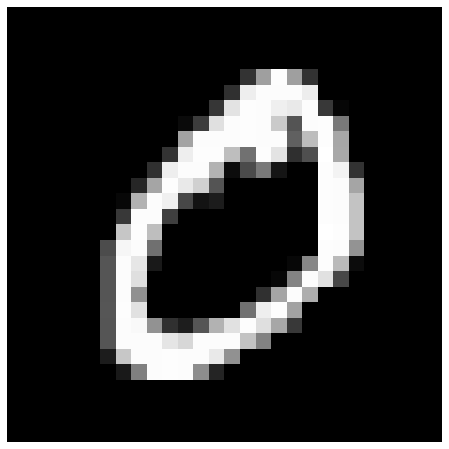

In [10]:
# можно визуализировать датасет

figure = plt.figure(figsize=(8, 8))
img, label = training_data[1]
# print(img)
print("/n/n/n---------------/n/n/n")
print(img.shape)
print(img.dtype)
print(img.device)
print("/n/n/n---------------/n/n/n")
print(label)
plt.axis("off")
squezed = img.squeeze() # убивает все лишние размерности
print(squezed.shape)
print(squezed.dtype)
print(squezed.device)
print("/n/n/n---------------/n/n/n")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Dataloader

В DL почти постоянно приходится работать не с целым датасетом, а с его разбиением на батчи. С помощью `Dataloader` это можно сделать просто и безболезненно.

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [12]:
# теперь просто итерируемся по dataloader, он будет последовательно выдавать батчи нужного размера

for batch, label in train_dataloader:
    print(batch.shape)
    print(label.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


## 3. Пишем нейронную сеть

Для моделей в PyTorch есть специальный namespace `torch.nn`. В нем есть довольно большая часть всех "строительных блоков" для нейронной сети, которые могут понадобиться в реальной жизни. Посмотрим, как написать свою небольшую нейронную сеть, в которой будет 3 линейных слоя, соединенные функцией активации сигмоидой.

In [22]:
from torch import nn

# создаем класс нейронной сети, который наследуем от базового класса для всех моделей nn.Module
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            torch.flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    # в функции forward описываем, как дожны идти данные от входа модели к выходу
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits



        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5)
                self.fc1 = nn.Linear(16 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)
         
            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x

In [23]:
model = NeuralNetwork()

for batch, label in train_dataloader:
    #print(batch.shape)
    #print(label.shape)
   
    logits = model(batch) # для каждого объекта получили вектор длины 10 (по числу классов)
    pred_probab = nn.Softmax(dim=1)(logits) # к выходам применяем функцию softmax, чтобы понять, у какого класса самая высокая вероятность по мнению модели
    y_pred = pred_probab.argmax(1) # предсказанный класс - класс с максимальной вероятностью
    #print(f"Predicted class: {y_pred}")
   
    break

TypeError: flatten() received an invalid combination of arguments - got (), but expected one of:
 * (Tensor input, int start_dim, int end_dim, name out_dim)
 * (Tensor input, int start_dim, int end_dim)
 * (Tensor input, name start_dim, name end_dim, name out_dim)
 * (Tensor input, tuple of names dims, name out_dim)


## 4. Обучение модели

Для полного счастья нам осталось сделать 2 вещи:
1. Определить лосс
2. Выбрать алгоритм оптимизации

К счастью, нам снова ничего не нужно писать руками, а просто взять уже готовое из PyTorch

In [24]:
loss_fn = nn.CrossEntropyLoss() # В качестве лосса возьмем кросс-энтропию
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # возьмем страндартный алгоритм оптимизации - стохастический градиентный спуск

NameError: name 'model' is not defined

In [ ]:
def switch_grad_mode(model: nn.Module , requires_grad: bool=True):
    for param in model.parameters():
        param.requires_grad = requires_grad


def switch_model_mode(model: nn.Module, train: bool=True):
    if train:
        model.train()
    else:
        model.eval()

In [ ]:
# сделаем все по красоте и вынесем в отдельную функцию train

def train(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    model = model.to(device)
    # перед обучением не забываем перевести модель в режим train, чтобы она обновляла веса
    switch_grad_mode(model, True)
    switch_model_mode(model, True)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device) # перекидываем батчи на нужное устройство

        # Вычисляем лосс
        pred = model(X) # делаем проход по функции forward
        loss = loss_fn(pred, y)

        # Теперь весь страшный алгоритм backprop, который был на лекции, скрыт от нас
        optimizer.zero_grad() # перед тем как считать новые градиенты, стираем градиенты с предыдущей итерации обучения
        loss.backward() # считаем градиенты
        optimizer.step() # посчитав градиент, просим оптимизатор обновить аргументы

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# точно так же сделаем в отдельной функции тестирование модели

def test(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    # переводим модель в режим тестирования
    # если вы используете валидацию, там нужно сделать то же самое
    switch_grad_mode(model, requires_grad=False)
    switch_model_mode(model, train=False)
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss() # В качестве лосса возьмем кросс-энтропию
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # возьмем страндартный алгоритм оптимизации - стохастический градиентный спуск
device = torch.device("cuda")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer, device)
    test(test_dataloader, model, loss_fn, device)
print("Done!")
torch.save(model.state_dict(), 'model_weights.pth') # сохраним веса обученной модели

Epoch 1
-------------------------------
loss: 2.304680  [    0/60000]
loss: 2.297548  [ 6400/60000]
loss: 2.296875  [12800/60000]
loss: 2.290167  [19200/60000]
loss: 2.288169  [25600/60000]
loss: 2.286131  [32000/60000]
loss: 2.280017  [38400/60000]
loss: 2.286523  [44800/60000]
loss: 2.269412  [51200/60000]
loss: 2.270993  [57600/60000]
Test Error: 
 Accuracy: 29.0%, Avg loss: 2.263272 

Epoch 2
-------------------------------
loss: 2.263927  [    0/60000]
loss: 2.269787  [ 6400/60000]
loss: 2.252097  [12800/60000]
loss: 2.246216  [19200/60000]
loss: 2.241627  [25600/60000]
loss: 2.234361  [32000/60000]
loss: 2.237398  [38400/60000]
loss: 2.227128  [44800/60000]
loss: 2.224945  [51200/60000]
loss: 2.208035  [57600/60000]
Test Error: 
 Accuracy: 57.9%, Avg loss: 2.204718 

Epoch 3
-------------------------------
loss: 2.206100  [    0/60000]
loss: 2.195406  [ 6400/60000]
loss: 2.189339  [12800/60000]
loss: 2.175092  [19200/60000]
loss: 2.174679  [25600/60000]
loss: 2.144530  [32000/600

In [ ]:
# чтобы загрузить сохранненые веса, необхомо сделать следующее
model = NeuralNetwork()
model.load_state_dict(torch.load('model_weights.pth'))
test(test_dataloader, model, loss_fn, torch.device("cpu"))

Test Error: 
 Accuracy: 72.9%, Avg loss: 1.653327 



# Задание

Написать и обучить нейронную сеть на датасете FashionMNIST (10 баллов)
1. Нейронная сеть должна иметь 5 линейных слоев. Выход 1го слоя должен иметь размер 256, 2го - 256, 3го - 128, 4го - 64.
2. Между слоями должна быть функция активации ReLU
3. Добавить валидацию на каждой 10 эпохе, печатать accuracy и loss на валидационной выборке
4. Обучите минимум 20 эпох 
5. Построить график лосса на обучении (средний лосс за каждую эпоху)
6. Построить график лосса и accuracy на валидации

Решение необходимо прислать в отдельном ноутбуке


Дополнительно:
1. (2 балла) Добавить еще пару слоев и dropout
2. (2 балла) Добавить early stopping
3. (5 баллов) Напишите код из задания на TensorFlow или используйте в задании выше PyTorch Lightning